In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
# Load the dataset
url = r"D:\Edyoda\archive\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv"
data = pd.read_csv(url)

In [12]:
print(data.columns)

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


In [18]:
wrangled = data[data['StratificationID1'] == 'OVERALL'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
question = wrangled[wrangled['Question'] == 'Percent of adults who engage in no leisure-time physical activity'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
x_all = question[question['YearStart'] == 2014][['LocationDesc','Data_Value' ]]
x = question[question['YearStart'] == 2014][['Data_Value' ]].values
x

array([[27.6],
       [19.2],
       [21.2],
       [30.7],
       [21.7],
       [16.4],
       [20.6],
       [24.9],
       [20.8],
       [23.7],
       [23.6],
       [27.7],
       [19.6],
       [18.7],
       [23.9],
       [26.1],
       [22.6],
       [23.8],
       [28.2],
       [29.5],
       [19.7],
       [21.4],
       [20.1],
       [25.5],
       [20.2],
       [31.6],
       [25. ],
       [19.6],
       [23.7],
       [21.3],
       [22.5],
       [19.3],
       [23.3],
       [23.3],
       [25.9],
       [23.2],
       [21.3],
       [25. ],
       [28.3],
       [16.5],
       [23.3],
       [40.6],
       [22.5],
       [25.3],
       [21.2],
       [26.8],
       [27.6],
       [16.8],
       [19. ],
       [23.5],
       [18.1],
       [28.7],
       [21.2],
       [22.1]])

In [19]:
wrangled = data[data['StratificationID1'] == 'OVERALL'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
year = wrangled[wrangled['Question'] == 'Percent of adults aged 18 years and older who have obesity'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
y_all = year[year['YearStart'] == 2014][['LocationDesc','Data_Value' ]]
y = year[year['YearStart'] == 2014][['Data_Value' ]].values
y

array([[33.5],
       [29.7],
       [28.9],
       [35.9],
       [24.7],
       [21.3],
       [26.3],
       [30.7],
       [21.7],
       [26.2],
       [30.5],
       [28. ],
       [22.1],
       [28.9],
       [29.3],
       [32.7],
       [30.9],
       [31.3],
       [31.6],
       [34.9],
       [28.2],
       [29.6],
       [23.3],
       [30.7],
       [27.6],
       [35.5],
       [30.2],
       [26.4],
       [28.9],
       [30.2],
       [27.7],
       [27.4],
       [26.9],
       [28.4],
       [27. ],
       [29.7],
       [32.2],
       [32.6],
       [33. ],
       [27.9],
       [30.2],
       [28.3],
       [27. ],
       [32.1],
       [29.8],
       [31.2],
       [31.9],
       [25.7],
       [24.8],
       [28.5],
       [27.3],
       [35.7],
       [31.2],
       [29.5]])

In [20]:
x = x.reshape(-1, 1)
x

array([[27.6],
       [19.2],
       [21.2],
       [30.7],
       [21.7],
       [16.4],
       [20.6],
       [24.9],
       [20.8],
       [23.7],
       [23.6],
       [27.7],
       [19.6],
       [18.7],
       [23.9],
       [26.1],
       [22.6],
       [23.8],
       [28.2],
       [29.5],
       [19.7],
       [21.4],
       [20.1],
       [25.5],
       [20.2],
       [31.6],
       [25. ],
       [19.6],
       [23.7],
       [21.3],
       [22.5],
       [19.3],
       [23.3],
       [23.3],
       [25.9],
       [23.2],
       [21.3],
       [25. ],
       [28.3],
       [16.5],
       [23.3],
       [40.6],
       [22.5],
       [25.3],
       [21.2],
       [26.8],
       [27.6],
       [16.8],
       [19. ],
       [23.5],
       [18.1],
       [28.7],
       [21.2],
       [22.1]])

In [21]:
y = y.reshape(-1, 1)
y

array([[33.5],
       [29.7],
       [28.9],
       [35.9],
       [24.7],
       [21.3],
       [26.3],
       [30.7],
       [21.7],
       [26.2],
       [30.5],
       [28. ],
       [22.1],
       [28.9],
       [29.3],
       [32.7],
       [30.9],
       [31.3],
       [31.6],
       [34.9],
       [28.2],
       [29.6],
       [23.3],
       [30.7],
       [27.6],
       [35.5],
       [30.2],
       [26.4],
       [28.9],
       [30.2],
       [27.7],
       [27.4],
       [26.9],
       [28.4],
       [27. ],
       [29.7],
       [32.2],
       [32.6],
       [33. ],
       [27.9],
       [30.2],
       [28.3],
       [27. ],
       [32.1],
       [29.8],
       [31.2],
       [31.9],
       [25.7],
       [24.8],
       [28.5],
       [27.3],
       [35.7],
       [31.2],
       [29.5]])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, test_size=.2, random_state=100)

In [23]:
print(f'X Train Data shape{x_train.shape}')
print(f'y Train Data shape{y_train.shape}')
print(f'X Test Data shape{x_test.shape}')
print(f'y Test Data shape{y_test.shape}')

X Train Data shape(43, 1)
y Train Data shape(43, 1)
X Test Data shape(11, 1)
y Test Data shape(11, 1)


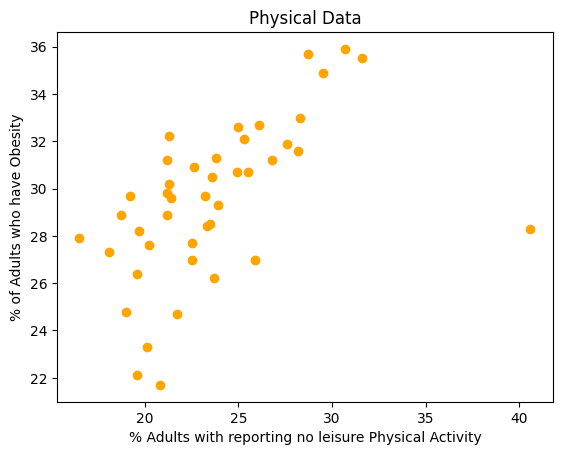

In [24]:
plt.scatter(x_train, y_train, color='orange')
plt.xlabel('% Adults with reporting no leisure Physical Activity')
plt.ylabel('% of Adults who have Obesity')
plt.title('Physical Data')
plt.show()

In [25]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

In [26]:
print(f'Train Accuracy {round(lm.score(x_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test)* 100,2)}%')

Train Accuracy 29.76%
Test Accuracy 44.09%


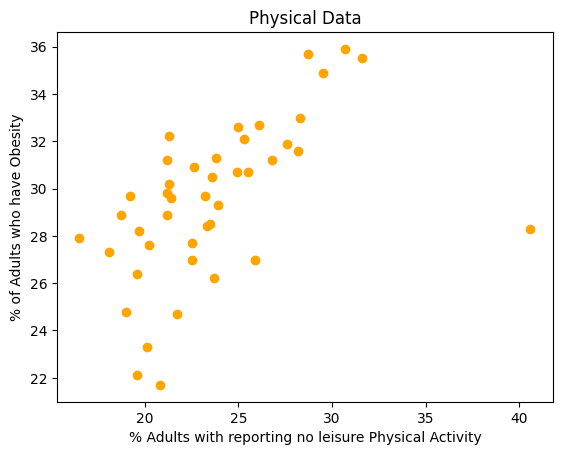

In [27]:
plt.scatter(x_train, y_train, color='orange')
plt.xlabel('% Adults with reporting no leisure Physical Activity')
plt.ylabel('% of Adults who have Obesity')
plt.title('Physical Data')
plt.show()